python程序设计基础

字符串中如果包含单引号，必须要使用转义符进行转移，不然字符串中有三个单引号就不对，此时，双引号可以作为转义符
比如：'what's your name?'三个单引号，不对，所以要用双引号进行转义
"what's your name?"这样才对

另外，使用三引号可以指示一个多行的字符串，可以在三引号中自由的使用单引号和双引号

在条件判断中，0，空列表[]，None都等同于false，因此，实际上，只有第三个会输出“yes”，其他的都不会输出
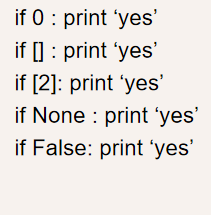

type()函数可以得到数据类型
或者：
import types

* callable()返回是否可调用
* getattr() 取得其属性/方法/子类


repr()比str()好用，repr()可以逆向操作，比如obj == eval(repr(obj))

字符串连接用加号，循环用型号*，字符串下标 word[4], word[0:2], word[:2],word[4:]，word[-2:]
注：索引左闭右开，即[a,b)


工厂函数
int(), long(), float(), complex()
str(), unicode(), basestring()
list(), tuple(), dict()
type()
新风格
bool()
set(), frozenset()
object()
classmethod()
staticmethod()
super()
property()
file()
1. 什么是 “工厂函数”？
在 Python 中，工厂函数是 “通过函数调用的方式创建对象的工具”—— 它们看起来是普通函数，但调用后会返回对应类型的对象；本质上，这些 “函数” 其实是对应类的构造接口（比如int()是int类的构造函数）。
因为 Python 不需要像其他语言那样用new关键字创建对象，直接用 “函数名 + 参数” 的形式就能生成实例，所以这类构造接口被称为 “工厂函数”。
2. 什么是 “新风格”？
截图里的 “新风格”，是指Python 版本迭代中新增 / 规范后的工厂函数（主要对应 Python 2.3 + 到 Python 3 的演进），是对早期 “旧工厂函数” 的补充 / 升级：
早期的 “旧工厂函数”（截图左列）：是 Python 最初支持的基础类型构造工具，比如int()（整数）、str()（字符串）、list()（列表）等，覆盖了最基础的数据类型。
“新风格工厂函数”（截图右列）：是 Python 后续版本中加入的、扩展了更多类型 / 特性的构造工具，比如：
bool()：Python 2.3 新增的布尔类型（True/False）的构造函数；
set()/frozenset()：Python 2.4 新增的集合类型的构造函数；
classmethod()/staticmethod()：面向对象编程中，用于定义类方法、静态方法的装饰器式工厂函数；
property()：用于定义类属性的工厂函数。
额外说明（版本差异）
截图里的左列还包含 Python 2 的旧语法（比如unicode()、basestring()、long()），这些在 Python 3 中已被简化 / 移除：
Python 3 中，unicode()合并到str()，long()合并到int()，basestring()被取消；
而右列的 “新风格” 工厂函数，是 Python 3 中仍在广泛使用的标准构造工具。


if表达式的比较
![alt text](image.png)
Python 中序列（sequence，比如元组、列表、字符串）的比较规则是 “逐元素按顺序比较”—— 从序列的第一个元素开始逐个对比，直到找到第一个不相等的元素，用这个元素的比较结果作为整个序列的比较结果。
结合你的例子逐个解释：
1. (1,2,3) < (1,2,4)（元组比较）
先比第 1 个元素：1 == 1，相等，继续；
再比第 2 个元素：2 == 2，相等，继续；
比第 3 个元素：3 < 4，结果为True → 整个元组的比较结果是True。
2. [1,2,3] < [1,2,4]（列表比较）
列表的比较规则和元组完全一致：
前 2 个元素都相等，第 3 个元素3 < 4 → 结果True。
3. 'abc' < 'c' < 'pascal' < 'python'（字符串比较）
字符串是字符的序列，比较的是字符对应的 ASCII 码值（或 Unicode 码值）：
'abc' < 'c'：
先比第 1 个字符：'a'的 ASCII 码（97） < 'c'的 ASCII 码（99）→ 直接得出True（后面的字符不用比了）；
'c' < 'pascal'：
第 1 个字符'c'（99） < 'p'（112）→ 结果True；
'pascal' < 'python'：
逐字符比：'p'=='p'→'a'=='a'→'s'（115） < 't'（116）→ 结果True。
补充规则：如果一个序列是另一个的 “前缀”
比如[1,2] < [1,2,3]：
前 2 个元素都相等，但左边序列更短 → 短的序列更小，结果为True。
简单说：序列比较是 “从头比、比到第一个不同的元素为止”，字符串则是比字符的编码值～

这四个都是 Python 中用于 ** 处理可迭代对象（列表、元组等）** 的常用工具（其中reduce在 Python 3 中需导入模块），核心作用是简化遍历、聚合、过滤等操作，以下逐个解释：
1. map：“映射” 函数到每个元素
作用：把一个函数应用到可迭代对象的每个元素上，返回包含结果的迭代器。
语法：map(函数, 可迭代对象1, 可迭代对象2,...)
2. reduce：“聚合” 元素为单个结果
注意：Python 3 中需从functools导入（from functools import reduce）。
作用：对可迭代对象的元素依次应用函数，将结果 “累积” 为单个值（比如求和、求积）。
语法：reduce(二元函数, 可迭代对象, [初始值])
3. filter：“过滤” 符合条件的元素
作用：用一个 “判断函数” 筛选可迭代对象，保留函数返回 True 的元素，返回迭代器。
语法：filter(判断函数, 可迭代对象)
4. zip：“打包” 多个可迭代对象的对应元素
作用：将多个可迭代对象的对应位置元素打包成元组，返回元组的迭代器（长度以最短的可迭代对象为准）。
语法：zip(可迭代对象1, 可迭代对象2,...)
注意，map、reduce、filter函数可以使用lambda函数定义函数

lambda函数定义：lambda x,y:……

python模块
模块中的_name_有什么用
模块中的__name__是 Python 的内置特殊变量，核心作用是标识模块的 “运行上下文”—— 用来区分模块是 “被直接运行”，还是 “被其他模块导入”，具体用途如下：
1. 核心功能：区分 “直接运行” vs “被导入”
当你直接运行一个.py文件时，Python 会把这个文件视为 “主程序”，此时该文件的__name__值会被设为 "__main__"；
当这个文件被其他模块导入时，它的__name__值会变成模块本身的名称（即文件名，不带.py后缀）。
2. 最常用场景：实现模块的 “自我测试”
利用__name__的特性，可以在模块中写测试代码—— 这些代码只有在 “直接运行模块” 时才会执行，被导入时则自动跳过，避免测试代码干扰其他模块。
示例：
创建一个模块my_module.py：
python
运行
# my_module.py
def add(a, b):
    return a + b

# 测试代码：只有直接运行这个模块时才会执行
if __name__ == "__main__":
    # 测试add函数
    print("直接运行模块，测试add函数：")
    print(add(2, 3))  # 输出5
场景 1：直接运行my_module.py
此时__name__ == "__main__"成立，测试代码会执行，输出5。
场景 2：在其他模块中导入my_module
比如在main.py中写：
python
运行
import my_module
print(my_module.add(2, 3))  # 输出5，但my_module里的测试代码不会执行
此时my_module的__name__是"my_module"，所以if __name__ == "__main__"不成立，测试代码被跳过。
3. 附加用途：标识模块名称
当需要获取模块的 “标识名” 时，可以直接用__name__（比如日志输出、模块注册等场景）。
总结
__name__的核心价值是让模块既能作为 “工具被导入”，又能作为 “独立程序运行（含测试）”，是 Python 模块化开发中很实用的小技巧。

注意：
1 模块应放置在与程序同一个目录下，
2 或sys.path所列目录之一，
3 或site-packages

创建自己的模块时需要：
1、写位置#/user/bin/python
2、写函数def ……
3、写版本version='0.1'

模块的搜索过程sys.path

当前目录

PYTHON的路径 site-packages

PATH

安装目录 /usr/local/lib/python


dir()函数可以查看对象（模块、变量、类）可用的属性/方法

dir()（查看当前环境的所有名字）

dir(sys)（查看 sys 模块的属性 / 方法）

getattr()是 Python 的动态获取对象成员的工具—— 简单说：不用 “对象。属性 / 方法” 的写法，而是用 “字符串形式的名字”，去拿到对象里的属性或方法（适合不确定要调用哪个属性 / 方法的场景）。

1. getattr()的核心逻辑
平时我们访问对象的属性 / 方法，是用 “点语法”：
li = ["Larry", "Curly"]
li.append("Moe")  # 点语法调用append方法
而getattr(obj, "名字") 等价于 obj.名字—— 用字符串形式的 “名字”，替代了点语法里的名字：
getattr(li, "append")("Moe")  # 等于 li.append("Moe")

一、先搞懂：什么是 “迭代方法” vs “非迭代方法”？
这两个概念是针对 **“获取字典元素集合” 的方法 ** 而言的：
迭代方法：调用后返回迭代器（一种 “惰性遍历” 的对象）—— 不会一次性把所有元素加载到内存，而是每次只生成一个元素，需要用for循环等方式逐个遍历才能拿到内容。
非迭代方法：调用后返回列表（一次性把所有元素生成并加载到内存）—— 直接能看到所有结果，不需要额外遍历。

二、图里的方法：哪些是迭代 / 非迭代方法？
注意：这两类方法的区分和 Python 版本强相关（图里提到了 Python2.x）：
1. 在 Python2 中：
迭代方法：iterkeys()、itervalues()、iteritems()
→ 这些方法返回迭代器，属于 “迭代方法”。
非迭代方法：keys()、values()、items()
→ 这些方法返回列表，属于 “非迭代方法”。
2. 在 Python3 中：
Python3 简化了方法，去掉了iter-开头的方法：
迭代方法：keys()、values()、items()
→ 这些方法直接返回迭代器（替代了 Python2 里的iter-开头方法），属于 “迭代方法”。
没有对应的 “非迭代方法” 了：如果需要列表，得手动用list(字典.keys())转成列表。

dict.fromkeys(seq, val=None)是 Python 字典的类方法，核心作用是快速创建新字典—— 用指定序列的元素作为字典的 “键”，用同一个值作为所有键对应的 “默认值”。
1. 核心说明
它是字典的类方法：不需要先创建字典实例，直接通过dict类调用（即dict.fromkeys(...)）；
作用：批量生成 “键来自序列、值统一默认” 的新字典。
2. 参数解释
seq（必填）：一个可迭代对象（如列表、元组、字符串），其中的元素会作为新字典的键；
val（可选）：所有键对应的默认值，默认是None（如果不指定，所有键的值都是None）。

数据结构进阶（要在collections模块中导入子模块）

collections是 Python 的内置增强数据结构模块，提供了比基础list/dict/tuple更灵活、实用的工具，你图里的这些是它的核心组件，逐个解释：
1. deque：双端队列
作用：是 “双端队列”，比基础list更高效地实现两端元素的添加 / 删除。
特点：appendleft()（左加）、popleft()（左删）的速度比list的insert(0)/pop(0)快很多。
场景：实现队列（先进先出）、栈（后进先出）。
示例：
python
运行
from collections import deque
q = deque([1,2,3])
q.appendleft(0)  # 左加 → deque([0,1,2,3])
q.popleft()      # 左删 → deque([1,2,3])
2. defaultdict：带默认值的字典
作用：是dict的子类，访问不存在的键时，会自动生成 “默认值”（不用手动判断if key not in dict）。
特点：创建时需指定 “默认值类型”（比如list/int）。
场景：统计、分组（比如把列表元素按某个规则分组到字典）。
示例：
python
运行
from collections import defaultdict
d = defaultdict(list)  # 不存在的键默认生成空列表
d["a"].append(1)       # 直接操作，不用先初始化d["a"]
print(d)  # defaultdict(list, {'a': [1]})
3. namedtuple：命名元组
作用：是tuple的子类，给元组的每个元素起了 “字段名”，比普通元组更易读。
特点：像 “轻量级的类”，但不可变（和元组一样）。
场景：表示简单的结构化数据（比如坐标、员工信息）。
示例：
python
运行
from collections import namedtuple
Point = namedtuple("Point", ["x", "y"])
p = Point(1, 2)
print(p.x)  # 用字段名访问 → 1（普通元组只能用p[0]）
4. UserDict/UserList/UserString：包装器类
作用：是对dict/list/str的 **“包装类”，方便你自定义扩展 ** 这些基础类型。
特点：直接继承这些类，比继承原生dict/list更易重写方法。
场景：需要自定义字典 / 列表（比如实现一个 “只能存整数的字典”）。
5. Counter：计数器
作用：专门用来统计可迭代对象中元素的出现次数，返回 “元素：次数” 的字典。
特点：自带most_common(n)（取出现次数最多的 n 个元素）等实用方法。
场景：词频统计、数据频次分析。
示例：
python
运行
from collections import Counter
cnt = Counter("abracadabra")
print(cnt)          # Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})
print(cnt.most_common(2))  # 最多的2个 → [('a',5), ('b',2)]
6. OrderedDict：有序字典
作用：是dict的子类，保留键的插入顺序（Python 3.7 + 后，普通dict也会保留插入顺序，但它有独有的方法）。
特点：支持move_to_end()（移动键到两端）、popitem(last=True)（按顺序删除）等方法。
场景：需要严格控制键顺序的字典（比如配置项的顺序敏感场景）。
7. ChainMap：链式字典
作用：把多个字典 “合并” 成一个视图（不是真的合并，原字典修改会同步）。
特点：查找键时，会按字典的顺序依次查找，直到找到为止。
场景：合并多个配置字典（比如 “默认配置 + 用户配置”）。
示例：
python
运行
from collections import ChainMap
default = {"a":1, "b":2}
user = {"b":3, "c":4}
cm = ChainMap(user, default)  # 先查user，再查default
print(cm["b"])  # 取user里的3 → 3

itertools模块

itertools 是 Python 内置的高效迭代器工具模块，使用前需先导入：import itertools，以下是模块内核心函数的语法、核心作用（合并此前内容）及简要示例，结构统一便于查阅：
1. accumulate
语法
python
运行
itertools.accumulate(iterable, func=None)
iterable：必填，可迭代对象（列表、元组等）；
func：可选，累积计算的二元函数（默认是加法lambda x,y: x+y）。
2. chain
语法
python
运行
itertools.chain(*iterables)
*iterables：必填，一个或多个可迭代对象（用逗号分隔）。
核心作用
把多个可迭代对象串联成一个，按顺序遍历所有对象的元素，不创建新列表，高效节省内存。
3. combinations
语法
python
运行
itertools.combinations(iterable, r)
iterable：必填，可迭代对象；
r：必填，整数，指定每个组合的元素个数。
核心作用
生成可迭代对象中不重复、不考虑顺序的r个元素组合（元素不可重复选取，(a,b)和(b,a)视为同一个组合）。
4. combinations_with_replacement
语法
python
运行
itertools.combinations_with_replacement(iterable, r)
参数含义同combinations。
核心作用
生成可迭代对象中允许元素重复选取、不考虑顺序的r个元素组合（同一个元素可多次入选组合）。
5. compress
语法
python
运行
itertools.compress(data, selectors)
data：必填，待筛选的可迭代对象；
selectors：必填，布尔值可迭代对象（与data元素对应）。
核心作用
用selectors中的布尔值筛选data，只保留selectors中对应值为True的data元素，按最短对象截断。
6. count
语法
python
运行
itertools.count(start=0, step=1)
start：可选，整数 / 浮点数，迭代起始值（默认 0）；
step：可选，整数 / 浮点数，迭代步长（默认 1）。
核心作用
生成无限递增 / 递减的序列，不会自动终止，需手动控制循环停止条件。
7. cycle
语法
python
运行
itertools.cycle(iterable)
iterable：必填，可迭代对象。
核心作用
无限循环遍历可迭代对象的元素，不会自动终止，需手动控制停止。
8. dropwhile
语法
python
运行
itertools.dropwhile(predicate, iterable)
predicate：必填，判断函数（返回布尔值）；
iterable：必填，可迭代对象。
核心作用
跳过可迭代对象中满足判断条件的开头连续元素，直到遇到第一个不满足条件的元素，返回后续所有元素（包括该元素）。
9. filterfalse
语法
python
运行
itertools.filterfalse(predicate, iterable)
predicate：必填，判断函数（返回布尔值，若为None则判断元素是否为False）；
iterable：必填，可迭代对象。
核心作用
与内置filter函数相反，筛选出所有不满足判断条件的元素，返回迭代器。
9. filterfalse
语法
python
运行
itertools.filterfalse(predicate, iterable)
predicate：必填，判断函数（返回布尔值，若为None则判断元素是否为False）；
iterable：必填，可迭代对象。
核心作用
与内置filter函数相反，筛选出所有不满足判断条件的元素，返回迭代器。
10. groupby
语法
python
运行
itertools.groupby(iterable, key=None)
iterable：必填，可迭代对象；
key：可选，分组依据函数（默认按元素本身分组）。
核心作用
把可迭代对象中相邻且具有相同键的元素分组，返回(键, 分组迭代器)的迭代器（注意：非相邻的相同键不会合并，需先排序）。
10. groupby
语法
python
运行
itertools.groupby(iterable, key=None)
iterable：必填，可迭代对象；
key：可选，分组依据函数（默认按元素本身分组）。
核心作用
把可迭代对象中相邻且具有相同键的元素分组，返回(键, 分组迭代器)的迭代器（注意：非相邻的相同键不会合并，需先排序）。
12. permutations
语法
python
运行
itertools.permutations(iterable, r=None)
iterable：必填，可迭代对象；
r：可选，整数，指定每个排列的元素个数（默认等于iterable的长度）。
核心作用
生成可迭代对象中不重复、考虑顺序的r个元素排列（(a,b)和(b,a)视为不同排列，元素不可重复选取）。
13. product
语法
python
运行
itertools.product(*iterables, repeat=1)
*iterables：必填，一个或多个可迭代对象；
repeat：可选，整数，指定所有可迭代对象重复遍历的次数（默认 1）。
14. repeat
语法
python
运行
itertools.repeat(object, times=None)
object：必填，需要重复的任意对象；
times：可选，整数，重复次数（默认None，无限重复）。
核心作用
重复生成指定对象，可指定次数，适用于需要批量生成相同元素的场景。
15. starmap
语法
python
运行
itertools.starmap(function, iterable)
function：必填，可接收多个参数的函数；
iterable：必填，元素为 “参数元组” 的可迭代对象。
核心作用
类似内置map，但会把iterable中的每个元组解包为多个参数传给函数，适用于函数需要多参数的场景。
16. takewhile
语法
python
运行
itertools.takewhile(predicate, iterable)
参数含义同dropwhile。
核心作用
与dropwhile相反，保留可迭代对象中满足判断条件的开头连续元素，遇到第一个不满足条件的元素立即停止，不再遍历后续元素。
17. tee
语法
python
运行
itertools.tee(iterable, n=2)
iterable：必填，可迭代对象；
n：可选，整数，需要复制的迭代器个数（默认 2）。
核心作用
把一个可迭代对象复制成n个独立的迭代器，解决迭代器 “只能遍历一次” 的问题，每个复制后的迭代器可独立使用。
18. zip_longest
语法
python
运行
itertools.zip_longest(*iterables, fillvalue=None)
*iterables：必填，一个或多个可迭代对象；
fillvalue：可选，填充值（用于补充较短对象的缺失元素，默认None）。
核心作用
类似内置zip，但以最长的可迭代对象为基准，较短对象的缺失元素用fillvalue填充，不会截断数据。

什么是面向对象
class ……
类通过“实例化”成为对象
![alt text](image-1.png)

![alt text](image-2.png)

特殊方法：
__init__(self, a, b)  初始化，在实例化的时候执行一些动作
__new__() 更像构造器
__del__()   析构函数，或称销毁函数
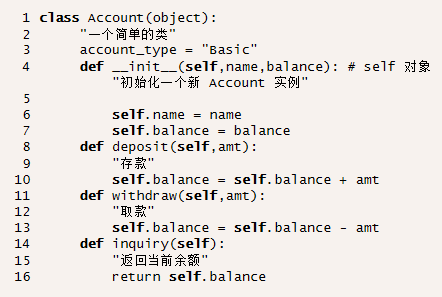




特殊的类属性
c.__name__  名称 

c.__doc__   文档字符串

c.__bases__  一个元组，包含所有父类

c.__dict__   c的属性/方法的集合

c.__module__ 所在模块

c.__class__ 对应的类


Python 面向对象的核心概念（封装、继承、多态、覆盖、super 调用）
1. 封装：“把数据和操作打包成一个‘盒子’”
类比：像一个 “快递盒”—— 盒子里装着数据（比如快递里的物品），还附带操作方法（比如 “打开盒子的步骤”），外面的人不用知道盒子里怎么装的，只用按方法操作。
代码里的体现：类就是 “封装” 的载体 —— 把属性（数据）和方法（操作代码）写在类里，打包成一个独立的 “功能单元”。
python
运行
封装的例子：“汽车类”封装了“颜色（数据）”和“行驶（操作）”
class Car:
    def __init__(self, color):
        self.color = color  # 封装的数据（属性）
    def run(self):          # 封装的操作（方法）
        print(f"{self.color}的车开始行驶")
2. 多重继承：“一个类同时‘遗传’多个父类的特征”
类比：一个孩子同时遗传 “爸爸的身高” 和 “妈妈的眼睛”—— 一个子类可以同时继承多个父类的属性和方法。
代码里的体现：class 子类(父类1, 父类2):（图里的class C(A,B):就是 C 同时继承 A 和 B）
python
运行
父类1：有“跑”的方法
class Father:
    def run(self):
        print("跑的很快")
父类2：有“跳”的方法
class Mother:
    def jump(self):
        print("跳的很高")
子类C：同时继承Father和Mother，同时有run和jump方法
class C(Father, Mother):
    pass
c = C()
c.run()  # 输出“跑的很快”（继承Father）
c.jump() # 输出“跳的很高”（继承Mother）
3. 多态：“同一个方法名，不同对象调用有不同效果”
类比：“‘叫’这个动作”—— 猫叫是 “喵”，狗叫是 “汪”，虽然都是 “叫”，但不同动物（对象）的表现不一样。
代码里的体现：图里的Circle.draw()、ellipse.draw()—— 都是draw()方法，但圆、椭圆、矩形调用时，会画出不同的形状。
python
运行
父类：定义“draw”方法的模板
class Shape:
    def draw(self):
        pass  # 空实现，让子类自己写
子类1：圆的draw
class Circle(Shape):
    def draw(self):
        print("画一个圆")
子类2：矩形的draw
class Rectangle(Shape):
    def draw(self):
        print("画一个矩形")
多态：同一个draw()，不同对象效果不同
Circle().draw()    # 输出“画一个圆”
Rectangle().draw() # 输出“画一个矩形”
4. 覆盖（Override）：“子类用同名方法‘替换’父类的方法”
类比：爸爸教你 “用筷子吃饭”，但你长大后改成 “用叉子吃饭”—— 子类写了和父类同名的方法，调用时会优先用子类自己的方法，把父类的方法 “盖住”。
python
运行
父类：有一个foo方法
class P:
    def foo(self):
        print("这是父类P的foo方法")
        #子类C：写了同名的foo方法，覆盖父类
class C(P):
    def foo(self):
        print("这是子类C的foo方法（覆盖了父类）")
c = C()
c.foo()  # 输出“这是子类C的foo方法（覆盖了父类）”——父类的foo被盖住了
二、第二张图：覆盖后，怎么找回父类的方法？（用super()）
如果子类覆盖了父类方法，但又想同时用父类的方法，可以用super(子类名, self).父类方法()（图里的super(C, self).foo()）。
代码对应图里的例子：
python
运行
class P:
    def foo(self):
        print("这是父类P的foo方法")
class C(P):
    def foo(self):
        # 先调用父类P的foo方法
        super(C, self).foo()  
        # 再执行子类自己的逻辑
        print("this is C.foo")
c = C()
c.foo()
输出：
这是父类P的foo方法
this is C.foo
总结
封装 = 把 “数据 + 操作” 打包成类；
多重继承 = 子类同时继承多个父类的功能；
多态 = 同名方法，不同对象有不同表现；
覆盖 = 子类用同名方法替换父类方法；
super() = 覆盖后，找回父类被盖住的方法。

如何使用对象

属性property/attribute

方法method/行为behavior

![alt text](image-3.png)

这三个对象对应的是 **MVC 架构（Model-View-Controller）** 的核心分工 —— 可以把它理解为 “一个软件的‘分工协作团队’”，每个对象负责不同的工作，互不干扰又互相配合：
1. 实体对象（Entity）= Model（模型）
作用：负责存储数据、处理业务逻辑（比如数据的规则、计算、验证），是软件的 “数据和业务核心”。
类比：像超市的 “商品仓库 + 商品信息表”—— 仓库存着商品（数据），信息表记录商品的价格、库存规则（业务逻辑），只负责管数据，不管怎么展示、怎么被操作。
例子：做一个购物 APP 时，“商品类” 就是实体对象：它存着商品的名称、价格、库存（数据），还能计算 “打折后的价格”（业务逻辑）。
2. 控制对象（Control）= Controller（控制器）
作用：是 “中间调度员”—— 接收界面的请求，调用实体对象处理数据，再把处理结果告诉界面；不直接碰数据，也不直接做界面，只负责协调两者。
类比：超市的 “导购员”—— 用户（界面）说 “我要查这个商品的库存”，导购员（控制对象）去仓库（实体对象）查库存，再回来告诉用户（界面）结果，不让用户直接进仓库。
例子：购物 APP 中，用户点 “查看库存” 按钮（界面），控制器接收这个请求，调用商品类（实体）查库存，再让界面显示库存数量。
3. 界面对象（Interface）= View（视图）
作用：负责用户能看到、能操作的部分（比如按钮、输入框、商品列表），只做 “展示内容” 和 “接收用户操作”，不处理数据逻辑。
类比：超市的 “收银台 / 货架展示区”—— 用户能看到商品（展示）、能告诉收银员想买什么（操作），但收银台不管商品存在哪、怎么定价。
例子：购物 APP 的 “商品列表页面”“购买按钮”“库存显示框”，都是界面对象，只负责给用户看和让用户点。



方法和属性的访问控制 visibility

公共public 任何其他对象均可使用，Python默认

私有private 仅供本对象及其类使用，双下划线，比如__setattr() erbushi_setattr()

保护protected 仅供本对象及其类，以及由继承产生的子类和对象使用(Python未提供)


其他的输入输出

1. 读取命令行参数:
import sys
for i in range(len(sys.argv)):
    print(sys.argv)

2. os.environ字典:环境变量
import os
path = os.environ["PATH"]
user = os.environ["USER"]
editor = os.environ["EDITOR"]

3. 文件处理函数
read([n]), readline([n]), readlines, xreadlines
write(s), writelines(l)
open/close

4. 标准输入输出sys.stdin, sys.stdout, sys.stderr
这三个是sys模块提供的标准文件对象，对应操作系统为程序分配的三个核心数据流 —— 可以把程序比作一个 “工厂”，这三个对象就是工厂和外界打交道的三个专用通道，各司其职：
1. sys.stdin（标准输入）
核心作用：程序的 “输入通道”，默认对应键盘，程序通过它读取用户输入的内容。
通俗类比：工厂的 “原料入口”，用户通过键盘往程序里 “送原料”（输入数据）。
关键特点：input()函数本质就是封装了sys.stdin，是更友好的输入方式；sys.stdin可直接读取多行 / 大段输入。
示例代码：
python
运行
import sys

# 读取一行输入（等价于 input()）
content = sys.stdin.readline()
print("你通过键盘输入的内容是：", content)

# 读取所有输入（直到用户按 Ctrl+D 结束）
# all_content = sys.stdin.read()
2. sys.stdout（标准输出）
核心作用：程序的 “正常输出通道”，默认对应屏幕，程序的正常结果、打印信息都从这里输出。
通俗类比：工厂的 “成品出口”，程序处理完的正常结果从这里送到屏幕给用户看。
关键特点：print()函数本质就是封装了sys.stdout.write()（自动加换行符）。
示例代码：
python
运行
import sys

# 等价于 print("正常结果")，但需要手动加换行符\n
sys.stdout.write("这是程序的正常输出\n")
3. sys.stderr（标准错误）
核心作用：程序的 “错误输出通道”，默认也对应屏幕，但专门用来输出错误、警告信息，和sys.stdout是完全独立的通道。
通俗类比：工厂的 “故障报警口”，程序出问题时的报错信息从这里输出，和正常成品分开，方便快速识别错误。
关键特点：即使把sys.stdout重定向到文件（比如让正常输出存到文件），sys.stderr仍会输出到屏幕，不影响报错排查。
示例代码：
python
运行
import sys

# 输出错误提示，不会和正常输出混在一起
sys.stderr.write("⚠️ 这是程序的错误/警告信息！\n")




重定向额外解释：
先搞懂：“重定向” 到底是什么？
我们之前说过：
sys.stdout 默认指向屏幕（程序正常输出都显示在屏幕上）；
sys.stderr 默认指向屏幕（报错信息也显示在屏幕上）；
sys.stdin 默认指向键盘（程序从键盘读输入）。
重定向 = 把这三个 “默认路径” 换掉：
比如让 sys.stdout 不再指向屏幕，而是指向一个文件 → 程序的正常输出就会写到文件里，不再显示在屏幕；
比如让 sys.stdin 不再指向键盘，而是指向一个文件 → 程序不从键盘读输入，而是直接从文件里读数据。
通俗类比
把程序比作 “快递站”：
原本：
收件（stdin）：只能从 “小区门口（键盘）” 收包裹；
寄件（stdout）：只能把正常包裹寄到 “用户家里（屏幕）”；
寄异常件（stderr）：只能把破损包裹寄到 “用户家里（屏幕）”。
重定向后：
收件：改成从 “仓库（文件）” 收包裹；
寄件：改成把正常包裹寄到 “快递柜（文件）”；
寄异常件：改成把破损包裹寄到 “回收站（文件）”。
场景 1：最常用 ——stdout 重定向到文件（把正常输出存到文件）
核心需求
原本print()的内容会显示在屏幕，现在想让这些内容写到指定文件里（比如保存程序运行日志）。
分步拆解代码（带详细注释）
python
运行
import sys

# 步骤1：先保存原来的stdout（重要！后续要恢复，不然程序后续输出会出问题）
# 相当于先记下来：“原本的正常包裹要寄到用户家里”
original_stdout = sys.stdout  

try:
    # 步骤2：打开一个文件，准备让stdout指向它
    # 'w'表示写入模式，encoding="utf-8"避免中文乱码
    with open("运行日志.txt", "w", encoding="utf-8") as f:
        # 步骤3：重定向——让sys.stdout指向这个文件
        sys.stdout = f  
        
        # 步骤4：此时所有print/.stdout.write的内容，都会写到文件里，不再显示在屏幕
        print("这是程序的正常输出1")
        print("这是程序的正常输出2：计算结果=100")
        sys.stdout.write("这是直接用stdout写的内容\n")
        
finally:
    # 步骤5：恢复stdout到原来的指向（屏幕）
    # 不管程序有没有出错，都要恢复，否则后续print会继续写到文件里
    sys.stdout = original_stdout  

# 步骤6：恢复后，print的内容又会显示在屏幕上
print("恢复后：这段内容会显示在屏幕上")

In [ ]:
###格式化操作符辅助指令

表 6.4 字符串格式化符号
格式化字符             转换方式
%c               转换成字符(ASCII 码值,或者长度为一的字符串)
%ra              优先用 repr()函数进行字符串转换
%s               优先用 str()函数进行字符串转换
%d / %i        转成有符号十进制数
%ub             转成无符号十进制数
%ob             转成无符号八进制数
%xb/%Xb         (Unsigned)转成无符号十六进制数(x/X 代表转换后的十六进制字符的大小写)
%e/%E          转成科学计数法(e/E 控制输出 e/E)
%f/%F           转成浮点数(小数部分自然截断)
%g/%G           %e 和%f/%E 和%F 的简写
%%               输出%

###


异常处理

try，except，else，finally

raise语句

raise是 Python 里主动抛出异常的核心语句 —— 简单说，它的作用是：让你手动 “触发” 一个错误，而不是等程序运行时自然出现错误。你可以用它来 “告诉程序”：“这里出问题了，需要停止运行（或被捕获处理）”。
先理解：为什么需要 raise？
程序运行中会自然出现异常（比如除零错误ZeroDivisionError、类型错误TypeError），但很多场景下，你需要自定义 “错误规则”：
比如要求用户输入的年龄必须是正数，若输入 - 5，程序本身不会报错，但这是 “业务逻辑上的错误”—— 这时就可以用raise主动抛出异常，提示错误。
通俗类比
就像学校查考勤：
自然错误：学生没带学生证（系统自动识别出错）；
主动抛出错误（raise）：老师发现学生伪造学生证，主动指出 “这是违规，要处理”（手动触发错误）。
raise 的核心用法（从简单到复杂）
用法 1：基础用法 —— 抛出指定类型的异常
python
运行
# 需求：年龄必须大于0，否则抛异常
age = -5
if age < 0:
    # 主动抛出ValueError（值错误）
    raise ValueError
运行结果：
plaintext
Traceback (most recent call last):
  File "test.py", line 4, in <module>
    raise ValueError
ValueError
程序会停止运行，并提示抛出了ValueError。
用法 2：带自定义提示信息（最常用）
给异常加说明，让报错更易理解：
python
运行
age = -5
if age < 0:
    # 抛出异常时，附带提示信息
    raise ValueError("年龄不能为负数！请输入大于0的数字")
运行结果：
plaintext
Traceback (most recent call last):
  File "test.py", line 4, in <module>
    raise ValueError("年龄不能为负数！请输入大于0的数字")
ValueError: 年龄不能为负数！请输入大于0的数字
提示信息直接说明错误原因，排查更高效。
用法 3：捕获异常后，重新抛出（保留错误轨迹）
有时你需要先捕获异常、做一些处理（比如记录日志），再把异常抛出去让上层处理：
python
运行
try:
    # 模拟计算错误
    result = 10 / 0
except ZeroDivisionError as e:
    # 先做处理：比如记录错误日志
    print(f"捕获到错误：{e}，已记录日志")
    # 重新抛出原异常（保留错误的完整轨迹）
    raise
运行结果：
plaintext
捕获到错误：division by zero，已记录日志
Traceback (most recent call last):
  File "test.py", line 4, in <module>
    result = 10 / 0
ZeroDivisionError: division by zero
既处理了异常（记录日志），又不掩盖错误，让上层代码能感知到问题。
用法 4：抛出自定义异常（进阶）
如果 Python 内置的异常类型（ValueError、TypeError 等）不够用，可自定义异常类，再用 raise 抛出：
python
运行
# 第一步：定义自定义异常类（继承Exception）
class AgeError(Exception):
    """自定义的年龄错误异常"""
    pass

# 第二步：抛出自定义异常
age = 150
if age > 120:
    raise AgeError("年龄超出合理范围（最大120）")
运行结果：
plaintext
Traceback (most recent call last):
  File "test.py", line 9, in <module>
    raise AgeError("年龄超出合理范围（最大120）")
AgeError: 年龄超出合理范围（最大120）
常用的内置异常类型（搭配 raise 使用）
异常类型	适用场景
ValueError	输入的值不符合规则（如负数年龄）
TypeError	数据类型错误（如传字符串当数字）
ZeroDivisionError	除零错误
IndexError	列表 / 元组索引越界
KeyError	字典键不存在
关键注意点
raise抛出异常后，如果没有 try-except 捕获，程序会直接终止运行；
异常提示信息要 “人话”，比如 “年龄不能为负数” 而非 “value error”，方便调试；
自定义异常必须继承Exception类（或其子类），否则无法被正常捕获。
总结
raise的核心：手动触发异常，用于 “业务逻辑错误”（而非程序自然错误）；
核心场景：校验输入合法性、自定义错误规则、捕获后重新抛出异常；
常用写法：raise 异常类型("提示信息")，既指定错误类型，又说明原因。

In [ ]:
可以自定义异常

#!/usr/bin/python
# Filename: raising.py

class ShortInputException(Exception):
    '''A user-defined exception class.'''
    def __init__(self, length, atleast):
        Exception.__init__(self)
        self.length = length
        self.atleast = atleast

try:
    s = raw_input('Enter something --> ')
    if len(s) < 3:
        raise ShortInputException(len(s), 3)
    # Other work can continue as usual here
except EOFError:
    print '\nWhy did you do an EOF on me?'
except ShortInputException, x:
    print 'ShortInputException: The input was of length %d, \
          was expecting at least %d' % (x.length, x.atleast)
else:
    print 'No exception was raised.' 


![alt text](image-4.png)


python标准库

常用built-in函数(不需要额外安装)

sys, os,
math, random, statistics,
datetime.date.today()
shutil.copyfile/.remove,
glob.glob,
sys.argv/stderr/stdin/stdout,
re.findall(r’\bf[a-z]*’,string)/.sub,
urllib.urlopen(‘http://...’),
smtplib.SMTP(‘localhost’)/.sendmail,
zlib.compress()/decompress(),


sys是一个模块对象，这些特殊成员可以分为几类（挑核心的解释）：
1. 描述模块 “元信息” 的属性
sys.__name__：模块的名称（之前讲过，sys模块的__name__就是"sys"）；
sys.__doc__：模块的文档字符串（即sys模块的说明文档，用help(sys)能看到）；
sys.__dict__：模块的 “属性字典”—— 存储了sys模块里所有的变量、函数、属性（比如sys.stdin、sys.version都存在这里）；
sys.__class__：sys模块对象的 “类”（Python 中模块的类是module类，即sys是module类的一个实例）。
2. 实现 “属性操作” 的方法
这些是 Python 内部用来获取 / 设置 / 删除对象属性的底层方法：
sys.__getattribute__：获取sys的属性时会调用（比如sys.stdin其实是通过这个方法拿到的）；
sys.__setattr__：设置sys的属性时调用（比如sys.stdin = 新对象会触发它）；
sys.__delattr__：删除sys的属性时调用（很少用，模块属性一般不删）。
3. 实现 “字符串表示” 的方法
用于把sys模块对象转成字符串（调试 / 打印时用）：
sys.__str__：用str(sys)时调用，返回 “友好的字符串描述”；
sys.__repr__：用repr(sys)时调用，返回 “更详细的调试用字符串”。
4. 和 “标准流” 相关的属性
就是之前讲过的标准输入 / 输出 / 错误流的底层引用：
sys.__stdin__：标准输入流的原始引用（平时用的sys.stdin是它的 “别名”，可以被重定向）；
sys.__stdout__：标准输出流的原始引用；
sys.__stderr__：标准错误流的原始引用。
5. 其他 Python 内部机制相关的方法
比如sys.__init__（模块初始化时的方法）、sys.__reduce__（对象序列化时用）等 —— 这些是 Python 解释器内部使用的，普通开发几乎用不到。

![alt text](image-5.png)

![alt text](image-6.png)


![alt text](image-7.png)

![alt text](image-8.png)